## Data Pipline

In [10]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('data/Amazon Sale Report.csv')
df.head()

/tmp/ipykernel_4909/3481037341.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [12]:
df.shape

(128975, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

### Applying the SimpleImputer transformer

In [14]:
imputer=SimpleImputer(strategy='mean')
df[['Amount']]=imputer.fit_transform(df[['Amount']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              128975 non-nul

### Applying the standardScaler

In [15]:
df['Amount'].dtype

dtype('float64')

In [16]:
df_s=[x for x in df.columns if df[x].dtype not in ['object','bool']]
df_scaler=df[df_s]
df_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             128975 non-null  int64  
 1   Qty               128975 non-null  int64  
 2   Amount            128975 non-null  float64
 3   ship-postal-code  128942 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 3.9 MB


In [20]:
df_scaler.drop('index',axis=1,inplace=True)

/tmp/ipykernel_4909/3234171465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaler.drop('index',axis=1,inplace=True)


In [22]:
df_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Qty               128975 non-null  int64  
 1   Amount            128975 non-null  float64
 2   ship-postal-code  128942 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.0 MB


In [24]:
df_scaler.drop(np.arange(2000,len(df_scaler)),axis=0,inplace=True)

/tmp/ipykernel_4909/111059436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaler.drop(np.arange(2000,len(df_scaler)),axis=0,inplace=True)


In [29]:
df_scaler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Qty               1998 non-null   int64  
 1   Amount            1998 non-null   float64
 2   ship-postal-code  1998 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 62.4 KB


In [28]:
df_scaler.dropna(inplace=True)

/tmp/ipykernel_4909/1855018735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaler.dropna(inplace=True)


In [30]:
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(df_scaler)
print(scaled_data)

[[-1.99884888  0.05482715 -0.38907354]
 [ 0.22729385 -0.85571853  0.43557859]
 [ 0.22729385 -1.14589326 -0.33686922]
 ...
 [-1.99884888  0.05837506 -1.88364086]
 [ 0.22729385 -0.4336462  -0.33257082]
 [ 0.22729385  0.41803546  0.43536212]]


In the above few cells ,I have reduced the size of my dataset so that i can easily compute the results

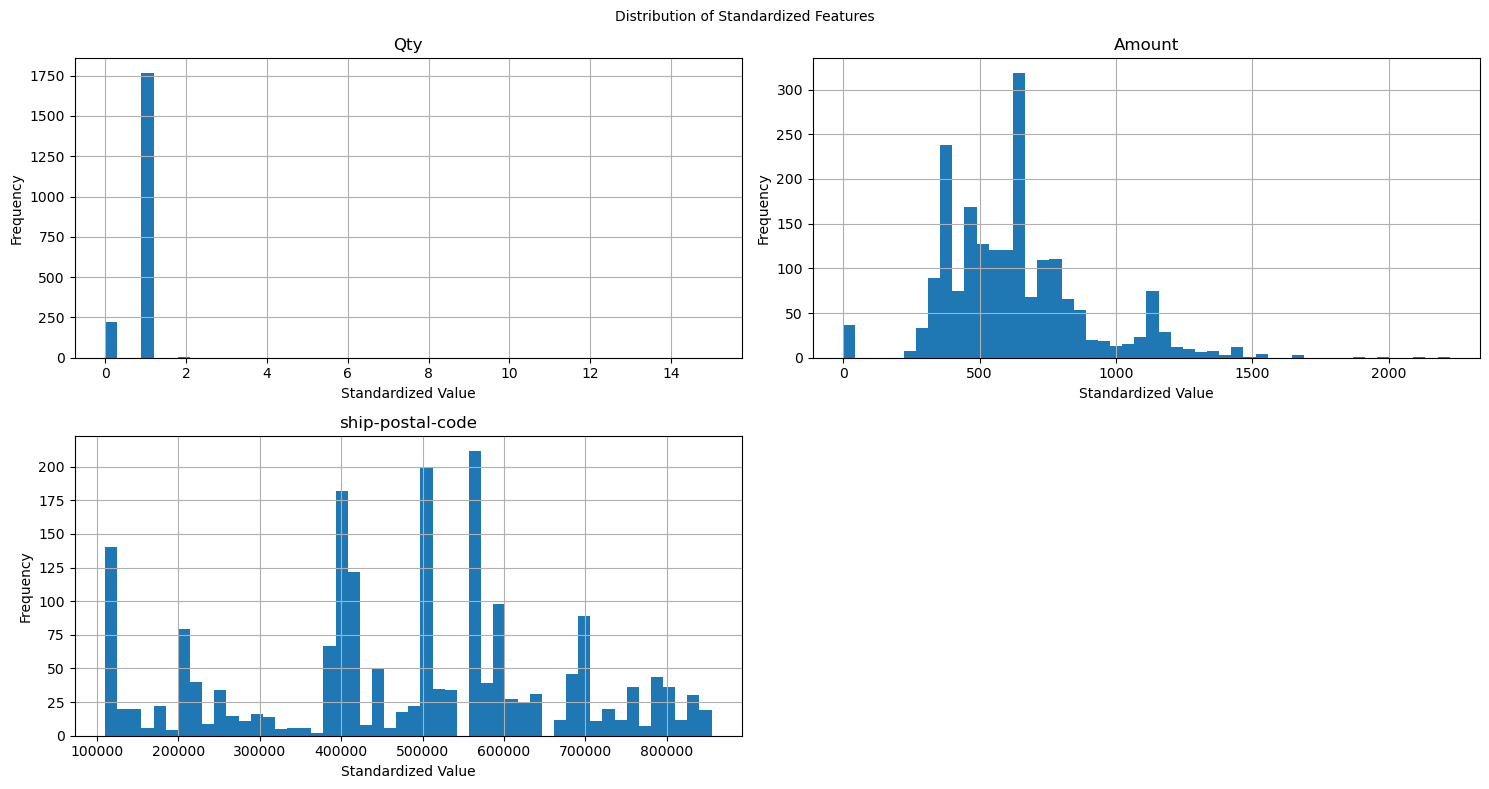

In [37]:
axes = df_scaler.hist(bins=50, figsize=(15,8))
plt.suptitle("Distribution of Standardized Features", fontsize=10)
for ax in axes.ravel():
    ax.set_xlabel("Standardized Value")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()
